In [1]:
# Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Cargando datos
df = pd.read_csv('./db_sf6_sudamerica_mr.csv')
df.head(5)

,jugador,cfn_id,personaje,pais,mr
0,Renameless,3311873515,Chun-Li,Brasil,2022
1,JUNINHO-RAS,2622990354,Luke,Brasil,2003
2,Salvatore_pc,1154684827,Cammy,Venezuela,2002
3,Killerwal,3381453962,Ken,Chile,2002
4,Dookie-PC,3277074647,JP,Argentina,2000


In [3]:
df

,jugador,cfn_id,personaje,pais,mr
0,Renameless,3311873515,Chun-Li,Brasil,2022
1,JUNINHO-RAS,2622990354,Luke,Brasil,2003
2,Salvatore_pc,1154684827,Cammy,Venezuela,2002
3,Killerwal,3381453962,Ken,Chile,2002
4,Dookie-PC,3277074647,JP,Argentina,2000
...,...,...,...,...,...
235,Popibluebeast,4250725960,Chun-Li,Argentina,1716
236,JUNINHO-RAS,2622990354,Guile,Brasil,1716
237,Im_OptimusPrime,1458493388,Marisa,Brasil,1716
238,iPeru,3823510405,Rashid,Perú,1716


In [60]:
# Binning del MR
bin_edges = [900,1000,1100,1200,1300,1400,1500,1600,1800,1900,2000,2100,2200]
df['bin'] = pd.cut(df['mr'],bins=bin_edges)
df.head()

,jugador,cfn_id,personaje,pais,mr,bin
0,Renameless,3311873515,Chun-Li,Brasil,2022,"(2000, 2100]"
1,JUNINHO-RAS,2622990354,Luke,Brasil,2003,"(2000, 2100]"
2,Salvatore_pc,1154684827,Cammy,Venezuela,2002,"(2000, 2100]"
3,Killerwal,3381453962,Ken,Chile,2002,"(2000, 2100]"
4,Dookie-PC,3277074647,JP,Argentina,2000,"(1900, 2000]"


In [46]:
# Promedio MR por país

avg_mr_country = df.groupby('pais')['mr'].mean().astype('int')
avg_mr_country_final = avg_mr_country.to_frame()
avg_mr_country_final.reset_index(inplace=True)
avg_mr_country_final

,pais,mr
0,Argentina,1809
1,Bolivia,1717
2,Brasil,1803
3,Chile,1790
4,Colombia,1848
5,Ecuador,1770
6,Paraguay,1839
7,Perú,1799
8,Uruguay,1743
9,Venezuela,1832


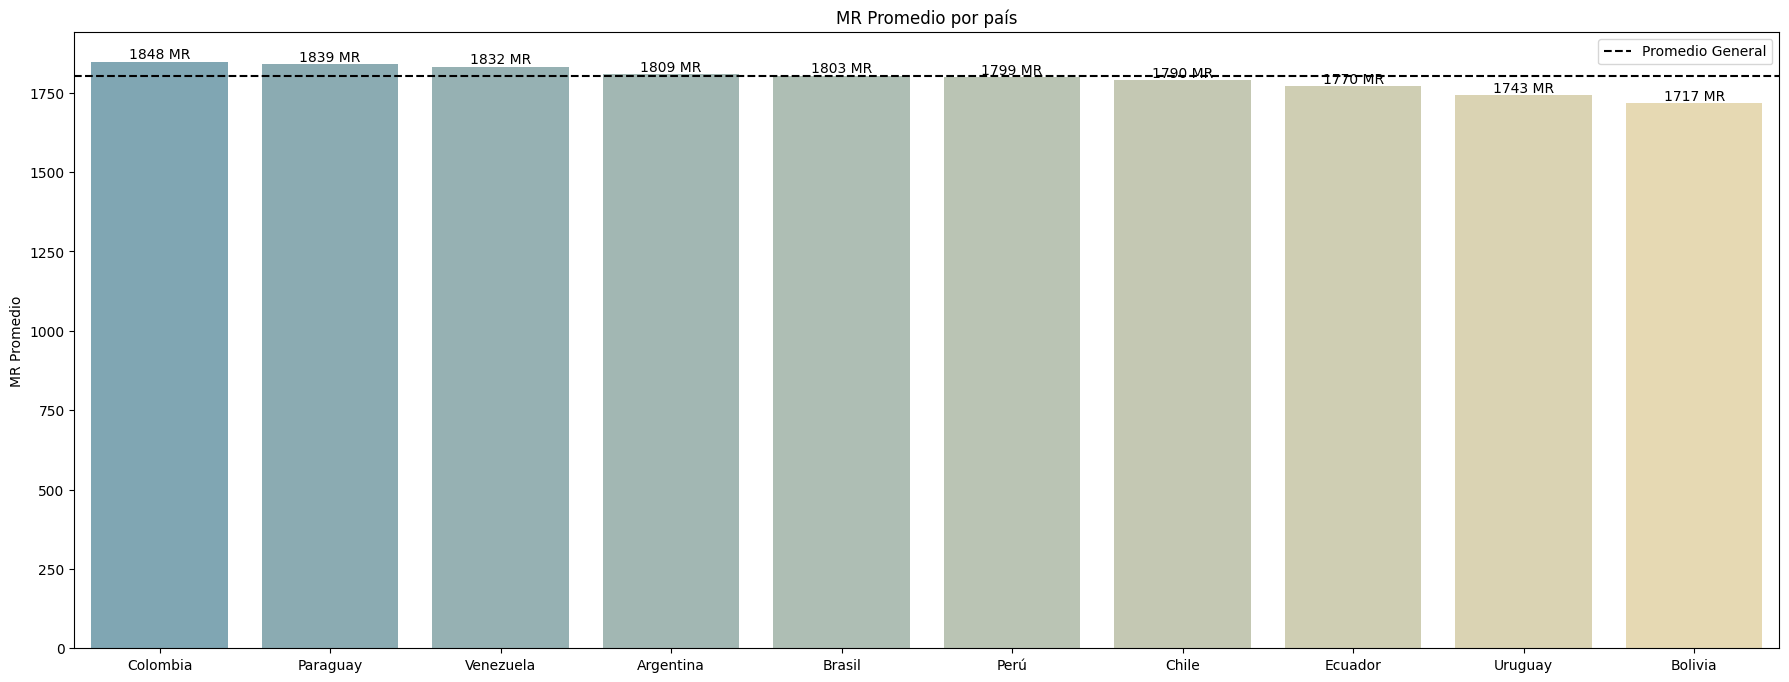

In [86]:
# Grafico

# Plot y config
plt.figure(figsize=(22, 8))
sns.barplot(data = avg_mr_country_final.sort_values(by='mr',ascending=False),x='pais',y='mr',palette="blend:#7AB,#EDA")
plt.title("MR Promedio por país")
ax = plt.gca()
ax.set_xlabel("")
ax.set_ylabel('MR Promedio')

# Agregando data marks
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f} MR', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
# Agregando el promedio
mr_avg = df['mr'].mean()
plt.axhline(y = mr_avg,color='black',linestyle='--',label='Promedio General')
plt.legend()

# Show
plt.show()

In [77]:
# Promedio MR por personaje

avg_mr_pj = df.groupby('personaje')['mr'].mean().astype('int')
avg_mr_pj_final = avg_mr_pj.to_frame()
avg_mr_pj_final.reset_index(inplace=True)
avg_mr_pj_final.sort_values(by='mr',ascending=False)

,personaje,mr
5,Dhalsim,1828
1,Blanka,1825
8,JP,1821
2,Cammy,1814
11,Ken,1813
15,Manon,1807
14,Luke,1806
9,Jamie,1803
4,Dee Jay,1802
3,Chun-Li,1800


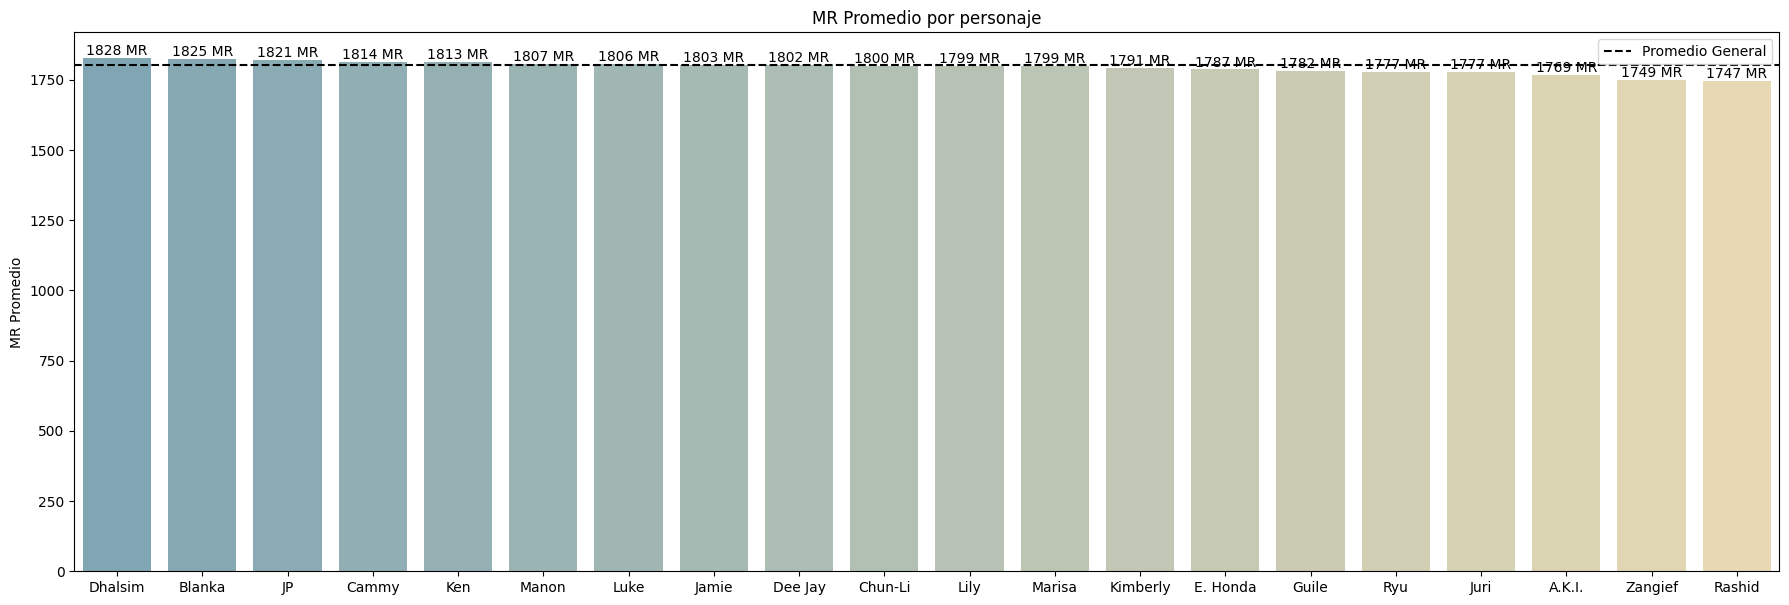

In [79]:
# Grafico

# Plot y config
plt.figure(figsize=(22, 7))
sns.barplot(data = avg_mr_pj_final.sort_values(by='mr',ascending=False),x='personaje',y='mr',palette="blend:#7AB,#EDA")
plt.title("MR Promedio por personaje")
ax = plt.gca()
ax.set_xlabel("")
ax.set_ylabel('MR Promedio')

# Agregando data marks
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f} MR', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
# Agregando el promedio
mr_avg = df['mr'].mean()
plt.axhline(y = mr_avg,color='black',linestyle='--',label='Promedio General')
plt.legend()

# Show
plt.show()

In [112]:
# Uso de personajes por pais

conteo_personajes = df.groupby(['pais','personaje']).size().reset_index(name='cantidad')
conteo_personajes

# Este plot lo hice en Tableau, no me dio la cabeza

,pais,personaje,cantidad
0,Argentina,A.K.I.,1
1,Argentina,Cammy,1
2,Argentina,Chun-Li,2
3,Argentina,Dee Jay,1
4,Argentina,Dhalsim,1
...,...,...,...
69,Venezuela,Cammy,1
70,Venezuela,Dee Jay,1
71,Venezuela,Juri,1
72,Venezuela,Luke,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


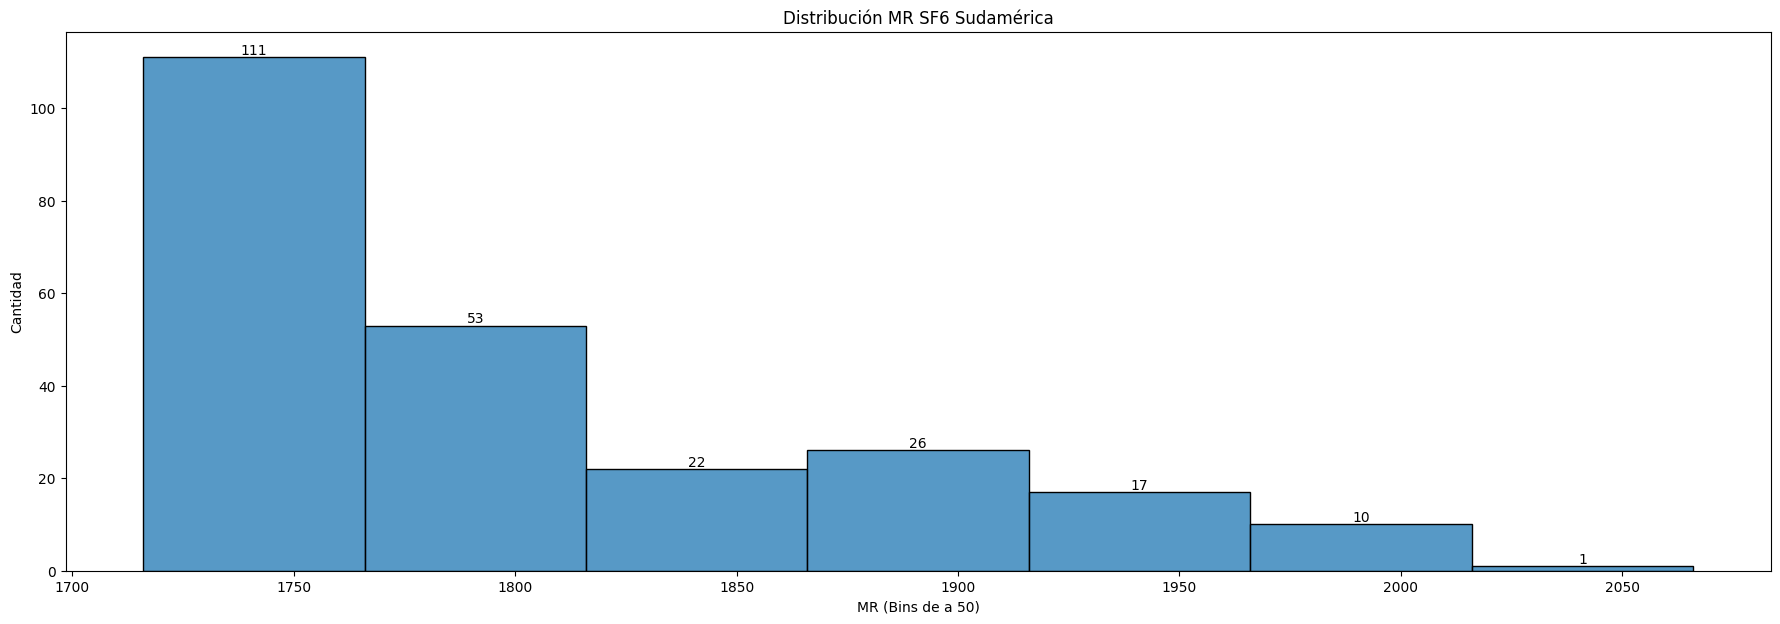

In [74]:
# Plot y config
plt.figure(figsize=(22, 7))
cols = ['grey' if (x < df['mr'].max()) else 'orange' for x in df['mr']]
histplot = sns.histplot(data=df['mr'],binwidth=50)
ax = plt.gca()

# Seteando ticks y labels
ticks = range(1700,2100,50)
ax.set_xticks(ticks)
plt.title("Distribución MR SF6 Sudamérica")
plt.ylabel('Cantidad')
plt.xlabel("MR (Bins de a 50)")


# Configurando leyenda
histplot.legend().set_visible(False)


# Agregando data marks
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Show
plt.show()

